In [4]:
import sys
sys.path.append('../')
import glob2 as glob
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.preprocessing import OneHotEncoder

pd.options.display.max_columns = 200
pd.options.display.max_rows = 200
%matplotlib inline

from sklearn import preprocessing
import warnings; warnings.simplefilter('ignore')

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.model_selection import ShuffleSplit, KFold
from sklearn.model_selection import cross_val_score

In [6]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import svm

In [7]:
from sklearn.ensemble import RandomForestClassifier


In [8]:
train_features = pd.read_csv('data2/dpc_train_features.csv', index_col='match_id')
test_features = pd.read_csv('data2/dpc_test_features.csv', index_col='match_id')
train_targets = pd.read_csv('data2/dpc_train_target.csv', index_col='match_id')
test_targets = pd.read_csv('data2/dpc_test_target.csv', index_col='match_id')

In [14]:
features_heroes = {
                    '1hero_id',
                    '2hero_id',
                    '3hero_id',
                    '4hero_id',
                    '5hero_id',
                    '6hero_id',
                    '7hero_id',
                    '8hero_id',
                    '9hero_id',
                    '10hero_id',
                    '11hero_id',
                    '12hero_id',
                    '13hero_id',
                    '14hero_id',
                    '15hero_id',
                    '16hero_id',
                    '17hero_id',
                    '18hero_id',
                    '19hero_id',
                    '20hero_id',
                    '21hero_id',
                    '22hero_id'
}

In [16]:
train_features.columns(features_heroes)

TypeError: unhashable type: 'set'

In [5]:
train_targets.head()

,radiant_win,duration
match_id,,
5115031896,1,2069
4865407245,0,2524
4889341660,0,2151
5050335216,1,2484
4860032461,1,1958


In [40]:
heroes_df_train = train_features[[f'{i}hero_id' for i in range(1, 23)]]

In [41]:
heroes_df_test = test_features[[f'{i}hero_id' for i in range(1, 23)]]

In [42]:
%%time

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(, X_test)
OneHotEncoder(handle_unknown='ignore')

Wall time: 4.99 ms


OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='ignore', sparse=True)

In [43]:
enc.categories_

[array([1], dtype=int64),
 array([0, 1], dtype=int64),
 array([  2,   3,   4,   6,   7,   9,  10,  16,  18,  19,  23,  25,  27,
         29,  31,  33,  37,  38,  40,  41,  42,  43,  46,  52,  53,  55,
         57,  58,  59,  60,  61,  62,  65,  66,  68,  69,  71,  72,  73,
         74,  75,  76,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,
         89,  90,  91,  93,  96,  97,  98,  99, 102, 103, 104, 105, 106,
        107, 111, 112, 119, 120, 121, 129], dtype=int64),
 array([1], dtype=int64),
 array([0, 1], dtype=int64),
 array([  2,   3,   4,   7,   9,  10,  16,  17,  18,  19,  22,  23,  25,
         31,  33,  37,  38,  41,  42,  43,  46,  50,  52,  54,  55,  57,
         58,  59,  60,  61,  65,  66,  67,  68,  71,  72,  73,  74,  76,
         78,  79,  80,  81,  83,  84,  85,  86,  88,  89,  90,  91,  94,
         96,  97,  98,  99, 102, 103, 105, 106, 107, 111, 112, 119, 120,
        121, 129], dtype=int64),
 array([1], dtype=int64),
 array([0, 1], dtype=int64),
 array([  2,  

In [9]:
enc.transform(X_train)

<1045x2081 sparse matrix of type '<class 'numpy.float64'>'
	with 68970 stored elements in Compressed Sparse Row format>

In [10]:
enc.transform(X_test)

<117x2081 sparse matrix of type '<class 'numpy.float64'>'
	with 7691 stored elements in Compressed Sparse Row format>

## Setup Model 

For the first pass, let's try the Random Forest model with the entire training set (i.e., will not split training data)

In [2]:
# Set up targets and features
y_train = train_targets.radiant_win.values # extract target variable 
X_train = train_features.values

y_test = test_targets.radiant_win.values # extract target variable 
X_test = test_features.values

NameError: name 'train_targets' is not defined

In [30]:
features_heroes = list([
                    '1hero_id',
                    '2hero_id',
                    '3hero_id',
                    '4hero_id',
                    '5hero_id',
                    '6hero_id',
                    '7hero_id',
                    '8hero_id',
                    '9hero_id',
                    '10hero_id',
                    '11hero_id',
                    '12hero_id',
                    '13hero_id',
                    '14hero_id',
                    '15hero_id',
                    '16hero_id',
                    '17hero_id',
                    '18hero_id',
                    '19hero_id',
                    '20hero_id',
                    '21hero_id',
                    '22hero_id'
])

In [1]:
train_features.columns(list(features_heroes))

NameError: name 'train_features' is not defined

In [38]:
heroes_df_train = X_train[[f'{i}hero_id' for i in range(1, 23)]]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [7]:
%%time

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(X_train, X_test)
OneHotEncoder(handle_unknown='ignore')

Wall time: 3.97 ms


OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='ignore', sparse=True)

In [8]:
enc.categories_

[array([1], dtype=int64),
 array([0, 1], dtype=int64),
 array([  2,   3,   4,   6,   7,   9,  10,  16,  18,  19,  23,  25,  27,
         29,  31,  33,  37,  38,  40,  41,  42,  43,  46,  52,  53,  55,
         57,  58,  59,  60,  61,  62,  65,  66,  68,  69,  71,  72,  73,
         74,  75,  76,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,
         89,  90,  91,  93,  96,  97,  98,  99, 102, 103, 104, 105, 106,
        107, 111, 112, 119, 120, 121, 129], dtype=int64),
 array([1], dtype=int64),
 array([0, 1], dtype=int64),
 array([  2,   3,   4,   7,   9,  10,  16,  17,  18,  19,  22,  23,  25,
         31,  33,  37,  38,  41,  42,  43,  46,  50,  52,  54,  55,  57,
         58,  59,  60,  61,  65,  66,  67,  68,  71,  72,  73,  74,  76,
         78,  79,  80,  81,  83,  84,  85,  86,  88,  89,  90,  91,  94,
         96,  97,  98,  99, 102, 103, 105, 106, 107, 111, 112, 119, 120,
        121, 129], dtype=int64),
 array([1], dtype=int64),
 array([0, 1], dtype=int64),
 array([  2,  

In [9]:
enc.transform(X_train)

<1045x2081 sparse matrix of type '<class 'numpy.float64'>'
	with 68970 stored elements in Compressed Sparse Row format>

In [10]:
enc.transform(X_test)

<117x2081 sparse matrix of type '<class 'numpy.float64'>'
	with 7691 stored elements in Compressed Sparse Row format>

In [11]:
X_train.shape, X_test.shape

((1045, 66), (117, 66))

Let's try not splitting the data 

In [14]:
# Train/Test Split for Validation 
#from sklearn.model_selection import train_test_split

#X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=17)


In [21]:
#X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

In [22]:
# Transform data 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
#X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

Fitting the random forest model to the training set. Checking performance as we adjust the number of trees. 

In [23]:
%%time 
from sklearn.ensemble import RandomForestClassifier

estimator_number = list(range(1,1001,10))
train_scores = []
test_scores= []

for i in estimator_number:
    rfc = RandomForestClassifier(n_estimators=i, n_jobs=4, random_state=17) # n_jobs refers to number of processors to use 
    rfc.fit(X_train, y_train)
    
    train_score = rfc.score(X_train, y_train) 
    test_score = rfc.score(X_test, y_test)
    
    train_scores.append(train_score)
    test_scores.append(test_score)
    
    if (i % 9== 0):
        print(f'tried {i} estimators')

tried 81 estimators
tried 171 estimators
tried 261 estimators
tried 351 estimators
tried 441 estimators
tried 531 estimators
tried 621 estimators
tried 711 estimators
tried 801 estimators
tried 891 estimators
tried 981 estimators
Wall time: 2min 13s


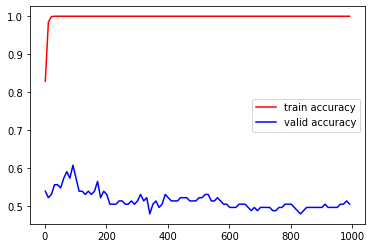

In [24]:
plt.figure()
plt.plot(estimator_number, train_scores, c='red', label='train accuracy')
plt.plot(estimator_number, test_scores, c='blue', label='valid accuracy')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

test_score = roc_auc_score(y_test, y_pred)
print('Validation ROC-AUC score:', test_score)


test_accuracy = accuracy_score(y_test, y_pred > 0.5)
print('Validation accuracy of P>0.5 classifier:', test_accuracy)

Hmmm... looks like 10 estimators is best we really need 

In [12]:
# Try this once with 10 estimators 

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10, n_jobs=4, max_depth=None, random_state=17)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
                       oob_score=False, random_state=17, verbose=0,
                       warm_start=False)

In [14]:
# https://www.kaggle.com/kashnitsky/dota-2-win-prediction-random-forest-starter
y_pred = model.predict_proba(X_test)[:, 1]

In [15]:
y_pred

array([0.4 , 0.5 , 0.5 , 0.7 , 0.3 , 0.5 , 0.5 , 0.4 , 0.5 , 0.1 , 0.2 ,
       0.4 , 0.7 , 0.5 , 0.55, 0.8 , 0.6 , 0.6 , 0.4 , 0.4 , 0.6 , 0.3 ,
       0.7 , 0.5 , 0.5 , 0.6 , 0.5 , 0.5 , 0.5 , 0.2 , 0.4 , 0.7 , 0.4 ,
       0.4 , 0.5 , 0.2 , 0.3 , 0.3 , 0.3 , 0.7 , 0.7 , 0.7 , 0.4 , 0.6 ,
       0.5 , 0.9 , 0.3 , 0.6 , 0.3 , 0.4 , 0.4 , 0.4 , 0.6 , 0.3 , 0.4 ,
       0.3 , 0.4 , 0.5 , 0.8 , 0.4 , 0.4 , 0.5 , 0.3 , 0.7 , 0.2 , 0.2 ,
       0.5 , 0.3 , 0.6 , 0.8 , 0.5 , 0.4 , 0.3 , 0.5 , 0.6 , 0.5 , 0.6 ,
       0.4 , 0.4 , 0.2 , 0.4 , 0.4 , 0.6 , 0.5 , 0.4 , 0.4 , 0.8 , 0.4 ,
       0.6 , 0.8 , 0.3 , 0.4 , 0.7 , 0.4 , 0.4 , 0.5 , 0.6 , 0.6 , 0.5 ,
       0.5 , 0.5 , 0.3 , 0.3 , 0.5 , 0.8 , 0.8 , 0.5 , 0.8 , 0.3 , 0.6 ,
       0.5 , 0.6 , 0.7 , 0.8 , 0.3 , 0.1 , 0.6 ])

In [16]:
from sklearn.metrics import roc_auc_score

test_score = roc_auc_score(y_test, y_pred)
print('Validation ROC-AUC score:', test_score)

Validation ROC-AUC score: 0.5655496766607878


In [18]:
from sklearn.metrics import accuracy_score

test_accuracy = accuracy_score(y_test, y_pred > 0.5)
print('Validation accuracy of P>0.5 classifier:', test_accuracy)

Validation accuracy of P>0.5 classifier: 0.5726495726495726


In [20]:
from xgboost import XGBClassifier

XGB_model = XGBClassifier(n_jobs=4, random_state=17 )
XGB_model.fit(X_train, y_train)
print(f"XG Boost score: {XGB_model.score(X_test, y_test)}")

XG Boost score: 0.5128205128205128


In [23]:
# https://www.kaggle.com/vladislavkisin/dota-2-new-approaches-model-comparison-json
#Count CV scoring and houldout scoring: 
holdout_score_1 = roc_auc_score(y_valid, model.predict_proba(X_valid)[:,1])
print('Holdout score: ', holdout_score_1)

Holdout score:  0.47310243183493006


In [ ]:
cv_score_1 = cross_val_score(model, full_df_mod[:idx_split], y_train, cv=cv, scoring = 'roc_auc') 

In [ ]:
# https://www.kaggle.com/vladislavkisin/dota-2-new-approaches-model-comparison-json
#New results.
print('CV scores: ', cv_score_1)
print('CV mean: ', cv_score_1.mean())
print('CV std:', cv_score_1.std())
print('Holdout score: ', holdout_score_1)
print('Better results on CV: ', cv_score_1>cv_score)